In [10]:
import pandas as pd
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols=['tweetid', 'entity', 'target', 'content']

data0 = pd.read_csv("twitter_training.csv",names=cols)
data1 = pd.read_csv("twitter_validation.csv",names=cols)

final_df = pd.concat([data0,data1])

In [11]:
final_df.head()

,tweetid,entity,target,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [12]:
final_df.shape

(75682, 4)

In [13]:
final_df.isna().sum()

tweetid      0
entity       0
target       0
content    686
dtype: int64

In [14]:
final_df.dropna(inplace=True)

In [15]:
final_df.duplicated().sum()

2857

In [16]:
final_df.drop_duplicates(inplace=True)

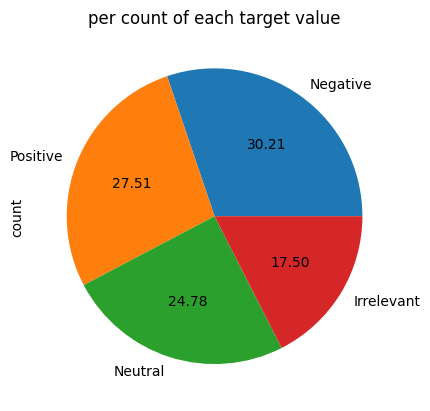

In [17]:
final_df['target'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title("per count of each target value")
plt.show()

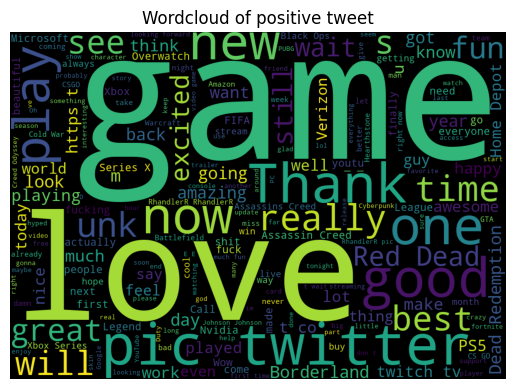

In [18]:
from wordcloud import WordCloud

wc = WordCloud(width=1000,height=700,min_font_size=10,background_color='black')
positive = wc.generate(final_df[final_df['target']=='Positive']['content'].str.cat(sep=" "))
plt.title('Wordcloud of positive tweet')
plt.axis('off')
plt.imshow(positive)
plt.show()

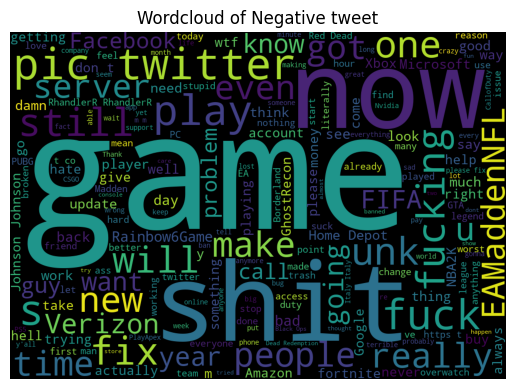

In [19]:
wc = WordCloud(width=1000,height=700,min_font_size=10,background_color='black')
negative = wc.generate(final_df[final_df['target']=='Negative']['content'].str.cat(sep=" "))
plt.title('Wordcloud of Negative tweet')
plt.axis('off')
plt.imshow(negative)
plt.show()

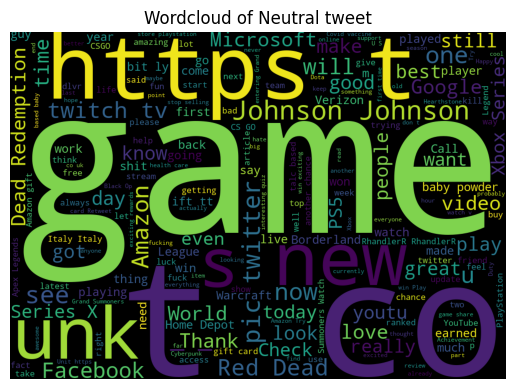

In [20]:
wc = WordCloud(width=1000,height=700,min_font_size=10,background_color='black')
neutral = wc.generate(final_df[final_df['target']=='Neutral']['content'].str.cat(sep=" "))
plt.title('Wordcloud of Neutral tweet')
plt.axis('off')
plt.imshow(neutral)
plt.show()

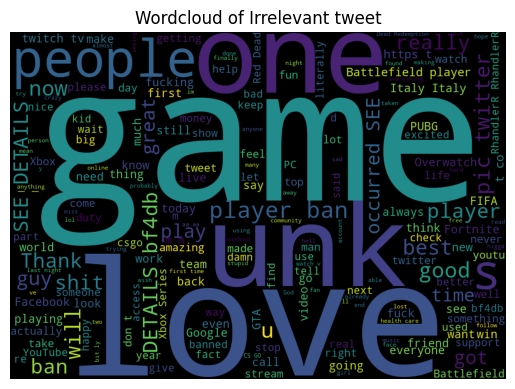

In [21]:
wc = WordCloud(width=1000,height=700,min_font_size=10,background_color='black')
irrelevant = wc.generate(final_df[final_df['target']=='Irrelevant']['content'].str.cat(sep=" "))
plt.title('Wordcloud of Irrelevant tweet')
plt.axis('off')
plt.imshow(irrelevant)
plt.show()

In [22]:
positive = []
for txt in final_df[final_df['target']=='Positive']['content'].tolist():
    for word in txt.split():
        positive.append(word)

/var/folders/6g/4zq1d985075_7_l6gxj2n81m0000gn/T/ipykernel_26348/3951353598.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(positive).most_common(50))[0],y=pd.DataFrame(Counter(positive).most_common(50))[1],palette='rainbow')


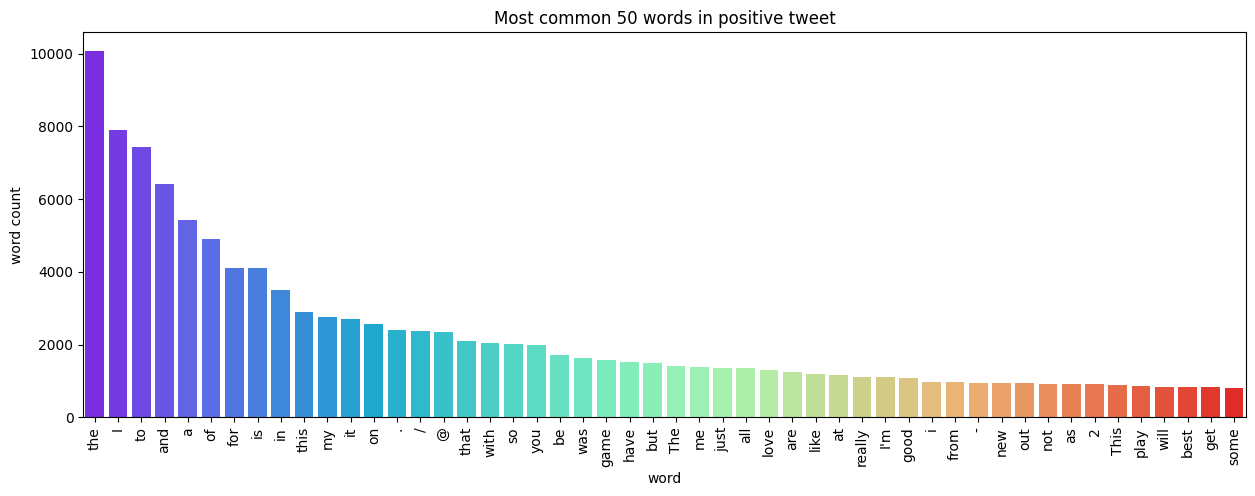

In [23]:
from collections import Counter

plt.figure(figsize=(15,5))
sns.barplot(x=pd.DataFrame(Counter(positive).most_common(50))[0],y=pd.DataFrame(Counter(positive).most_common(50))[1],palette='rainbow')
plt.xlabel('word')
plt.ylabel('word count')
plt.title('Most common 50 words in positive tweet')
plt.xticks(rotation=90)
plt.show()

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm.notebook import tqdm

In [25]:
final_df.describe()

,tweetid
count,72139.000000
mean,6435.469593
std,3743.598918
min,1.000000
25%,3195.000000
50%,6432.000000
75%,9607.000000
max,13200.000000
